In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data 

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [4]:
#check missing values counts
data.isna().sum()

Respondent                0
MainBranch              299
Hobbyist                 45
Age                   19015
Age1stCode             6561
                      ...  
WebframeWorkedWith    22182
WelcomeChange         11778
WorkWeekHrs           23310
YearsCode              6777
YearsCodePro          18112
Length: 61, dtype: int64

In [5]:
data.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

## Data Preparation

In [6]:
def preprocess_inputs(df):
    df = df.copy()
    
    #select only the necessary columns
    df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
    
    #rename the columns if required
    df.rename(columns = {'EdLevel': 'Education_Level',
                        'YearsCodePro': 'Years_Of_Experience',
                        'ConvertedComp': 'Salary'}, inplace = True)
    
    # converting uppercase columns headers to the lowercase headers
    df.columns = map(str.lower, df.columns)
    
    # drop all the rows in "salary" having NaN
    df = df[df['salary'].notnull()]
    
    # remove all records having missing values
    df = df.dropna()
    
    # keep only that records which has full time employees in it 
    df = df[df['employment'] == "Employed full-time"]
    
    #drop employment columns
    df = df.drop("employment", axis=1)
    
    # keep only the countries having counts more than 500
    country_values = df['country'].value_counts()
    country_values_list = country_values[country_values > 500].index.tolist()
    df = df[df['country'].isin(country_values_list)]
    
    # replace two unique value which are string in years_of_experience columns
    df['years_of_experience'].replace({"Less than 1 year": "0.5", "More than 50 years": "51"}, inplace = True)
    
    #drop unnecessary records in education_level
    index_name = df[(df['education_level'] == "Primary/elementary school") | 
                    (df['education_level'] == "I never completed any formal education") |
                   (df['education_level'] == "Professional degree (JD, MD, etc.)") |
                   (df['education_level'] == "Associate degree (A.A., A.S., etc.)")].index
    df.drop(index_name, inplace = True)
    
    # rename records in columns
    df['education_level'].replace({"Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor's Degree",
                                   "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master's Degree",
                                  "Some college/university study without earning a degree": "Dropouts",
                                  "Other doctoral degree (Ph.D., Ed.D., etc.)": "Doctoral Degree",
                                  "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary School"}, inplace = True)
    
    
    return df

In [7]:
X = preprocess_inputs(data)

In [8]:
X

,country,education_level,years_of_experience,salary
7,United States,Bachelor's Degree,13,116000.0
9,United Kingdom,Master's Degree,4,32315.0
10,United Kingdom,Bachelor's Degree,2,40070.0
11,Spain,Dropouts,7,14268.0
12,Netherlands,Secondary School,20,38916.0
...,...,...,...,...
64113,United States,Dropouts,15,225000.0
64116,United States,Bachelor's Degree,6,150000.0
64127,United States,Doctoral Degree,12,140000.0
64129,United States,Master's Degree,4,150000.0


In [9]:
# Little information about the data
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20295 entries, 7 to 64152
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              20295 non-null  object 
 1   education_level      20295 non-null  object 
 2   years_of_experience  20295 non-null  object 
 3   salary               20295 non-null  float64
dtypes: float64(1), object(3)
memory usage: 792.8+ KB


In [10]:
#checking the missing values
X.isna().sum()

country                0
education_level        0
years_of_experience    0
salary                 0
dtype: int64

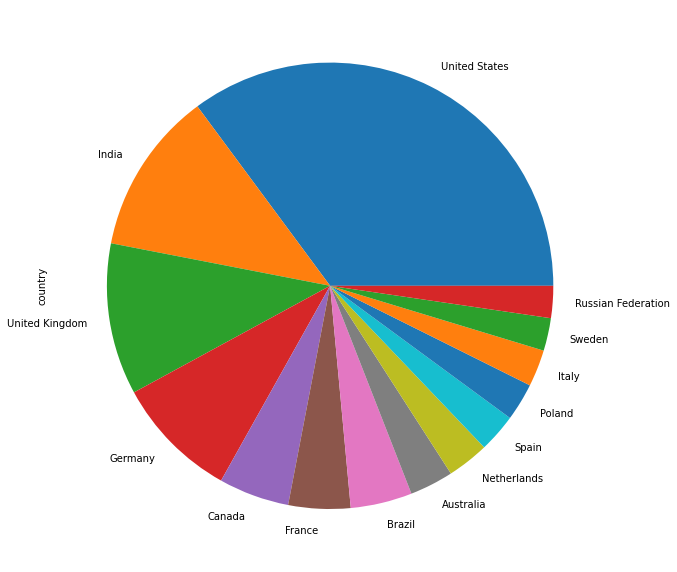

In [11]:
#checking the distribution of countries 
plt.figure(figsize= (10,12))
X['country'].value_counts().plot(kind = 'pie')
plt.show()

In [12]:
X['years_of_experience'].unique()

array(['13', '4', '2', '7', '20', '3', '12', '10', '29', '6', '28', '8',
       '23', '15', '14', '0.5', '25', '9', '5', '21', '16', '11', '18',
       '32', '1', '19', '22', '38', '30', '26', '27', '17', '24', '33',
       '34', '35', '36', '40', '39', '51', '31', '37', '41', '45', '42',
       '44', '43', '50', '49', '47'], dtype=object)

In [13]:
X.dtypes

country                 object
education_level         object
years_of_experience     object
salary                 float64
dtype: object

In [14]:
X['education_level'].unique()

array(["Bachelor's Degree", "Master's Degree", 'Dropouts',
       'Secondary School', 'Doctoral Degree'], dtype=object)

In [15]:
X['education_level'].value_counts()

Bachelor's Degree    10923
Master's Degree       5462
Dropouts              2317
Doctoral Degree        805
Secondary School       788
Name: education_level, dtype: int64

In [16]:
import pycaret.regression as pyr

In [17]:
pyr.setup(
    data = X,
    target = 'salary',
    train_size = 0.7,
    normalize = True
)

,Description,Value
0,session_id,967
1,Target,salary
2,Original Data,"(20295, 4)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(14206, 69)"


(967,
 None,
 {'mae': <pycaret.containers.metrics.regression.MAEMetricContainer at 0x7f7fe377e040>,
  'mse': <pycaret.containers.metrics.regression.MSEMetricContainer at 0x7f7fe377e070>,
  'rmse': <pycaret.containers.metrics.regression.RMSEMetricContainer at 0x7f7fe377e0a0>,
  'r2': <pycaret.containers.metrics.regression.R2MetricContainer at 0x7f7fe377e0d0>,
  'rmsle': <pycaret.containers.metrics.regression.RMSLEMetricContainer at 0x7f7fe377e100>,
  'mape': <pycaret.containers.metrics.regression.MAPEMetricContainer at 0x7f7fe377e190>},
        country_Australia  country_Brazil  country_Canada  country_France  \
 147                  0.0             0.0             0.0             0.0   
 15474                0.0             0.0             0.0             0.0   
 35451                0.0             0.0             0.0             0.0   
 57830                0.0             0.0             0.0             0.0   
 9391                 0.0             0.0             0.0             1.0

In [18]:
pyr.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,102814.7014,63272101381.7530,250772.7909,0.0756,1.1134,5.4922,0.1130
gbr,Gradient Boosting Regressor,102761.6037,63356753692.1149,250944.5412,0.0743,1.1226,5.5448,0.3790
ridge,Ridge Regression,103511.8062,63422236672.0000,251076.9906,0.0733,1.1097,5.2455,0.0180
llar,Lasso Least Angle Regression,103479.6904,63446077736.0823,251125.8506,0.0730,1.1075,5.2634,0.0220
lasso,Lasso Regression,103578.9258,63461206425.6000,251156.4594,0.0727,1.1092,5.2430,0.2840
omp,Orthogonal Matching Pursuit,104063.0955,63549413491.5712,251331.2995,0.0715,1.1601,5.8763,0.0190
lightgbm,Light Gradient Boosting Machine,104193.7916,63971107241.2184,252161.1755,0.0653,1.1061,5.0017,0.0480
xgboost,Extreme Gradient Boosting,104891.9359,65200069017.6000,254627.7906,0.0464,1.1065,5.5036,39.7800
en,Elastic Net,107938.3906,65927213875.2000,255970.4266,0.0370,1.4231,9.6768,0.0200
rf,Random Forest Regressor,106058.4144,66239942717.3954,256685.7390,0.0306,1.1043,5.6980,1.1980


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [19]:
best_model = pyr.create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,110755.8291,75808514557.7646,275333.4607,0.0814,1.1602,5.5183
1,92666.9453,46841260845.9272,216428.4197,0.0728,1.1577,3.2493
2,100525.6024,60830440566.4187,246638.2788,0.0685,1.0755,5.9509
3,106867.7084,67460033437.3532,259730.6941,0.0791,1.0740,7.5101
4,98999.1562,57934922477.2537,240696.7438,0.0814,1.0343,6.7834
5,105969.2800,65500784402.4799,255931.2103,0.0636,1.1630,5.6385
6,103060.1019,61740427539.3034,248476.2112,0.0843,1.1154,5.4789
7,101313.1577,62278959236.8889,249557.5269,0.0806,1.1092,2.3550
8,94898.5227,51946270875.7931,227917.2457,0.0800,1.1391,6.9768
9,113090.7103,82379399878.3476,287018.1177,0.0647,1.1058,5.4603


In [20]:
pyr.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [21]:
X.head(3)

,country,education_level,years_of_experience,salary
7,United States,Bachelor's Degree,13,116000.0
9,United Kingdom,Master's Degree,4,32315.0
10,United Kingdom,Bachelor's Degree,2,40070.0


In [23]:
X.iloc[[1,2]]

,country,education_level,years_of_experience,salary
9,United Kingdom,Master's Degree,4,32315.0
10,United Kingdom,Bachelor's Degree,2,40070.0


In [24]:
unseen_data = X.iloc[[1,2], :-1]
unseen_data

,country,education_level,years_of_experience
9,United Kingdom,Master's Degree,4
10,United Kingdom,Bachelor's Degree,2


In [25]:
prediction = pyr.predict_model(best_model, data = unseen_data)
print(prediction)

           country    education_level years_of_experience          Label
9   United Kingdom    Master's Degree                   4  125140.602843
10  United Kingdom  Bachelor's Degree                   2  121432.213246


## using pipeline

In [26]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model.Ridge import Ridge

from sklearn.metrics import r2_score

ModuleNotFoundError: No module named 'sklearn.linear_model.Ridge'